<a href="https://colab.research.google.com/github/yandexdataschool/MLatImperial2020/blob/master/03_lab/PCA-SVD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import scipy as sp
import numpy as np
import scipy.linalg as sla
import scipy.sparse as sps
import scipy.sparse.linalg as spla

import matplotlib.pyplot as plt
%pylab inline

import pandas as pd

Populating the interactive namespace from numpy and matplotlib


# PCA

We have a object - feature matrix $F$ of size l x n,

For the PCA the main task is to find such weight matrix $W$ such that 

$$
G = FW, s.t. \ \  \ ||GW^T - F||^2 -> min
$$

where $G$ - matrix of principle components of $F$ of size l x m, $W$ is transformation matrix of size n x m from old features to new.

Columns of matrix $W$ represent principal axis in the feature space.



In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
random_state = 0

# Load Digits dataset
X, y = datasets.load_digits(return_X_y=True)

# Split into train/test
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.5, stratify=y,
                     random_state=random_state)


Here we will study the something like mnist dataset - images of numbers from 0 to 9. each of which is size 8x8 pixels

In [3]:
X.shape, y.shape

((1797, 64), (1797,))

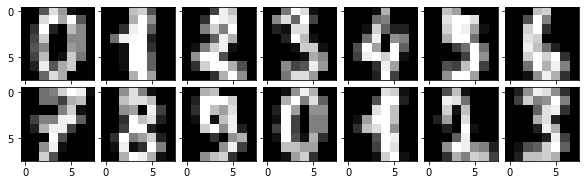

In [4]:
from mpl_toolkits.axes_grid1 import ImageGrid
fig = plt.figure(1,(10,10))
grid = ImageGrid(fig, 111,
                 nrows_ncols=(2,7),
                 axes_pad=0.1,
                 )
for i in range(14):
    image = X[i,:].squeeze().reshape(8,8)
    grid[i].imshow(image,cmap='gray',interpolation='none')

We can combine all the data preporcessing and algorithm we want to fit with sklearn make_pipeline tool. Thats comes very handy once you want to write more maintainable code and will be easy to check for bugs and change.

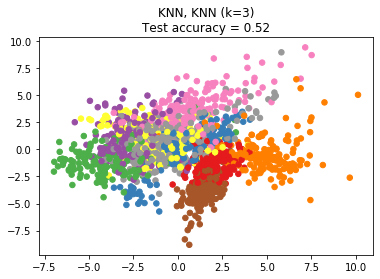

In [9]:
dim = len(X[0])
n_classes = len(np.unique(y))

n_neighbors = 3
n_components = 2

# Reduce dimension to 2 with PCA


knn_pca = make_pipeline(StandardScaler(),
                    PCA(n_components=n_components, random_state=1543),
                    KNeighborsClassifier(n_neighbors=n_neighbors))

# Fit the method's model
knn_pca.fit(X_train, y_train)

acc_knn = knn_pca.score(X_test, y_test)

# Embed the data set in 2 dimensions using the fitted model
X_transformed = knn_pca[:-1].transform(X)

# Plot the projected points and show the evaluation score
plt.figure()
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=y, s=30, cmap='Set1')
plt.title("{}, KNN (k={})\nTest accuracy = {:.2f}".format("KNN",
                                                          n_neighbors,
                                                          acc_knn))
plt.show()

In [0]:
def calculate_score(n_neighbors, n_components):
    ### In this function, implement fitting a pipeline
    ### with a given number or neighbors and pca components
    ### on the train data
    ### and evaluating it on the test data.
    
    <YOUR CODE>

    ### Return the test score
    score = 
    return score

plot the dependence of the score on the n_neigbours and n_components

Text(0, 0.5, 'N_neigbours')

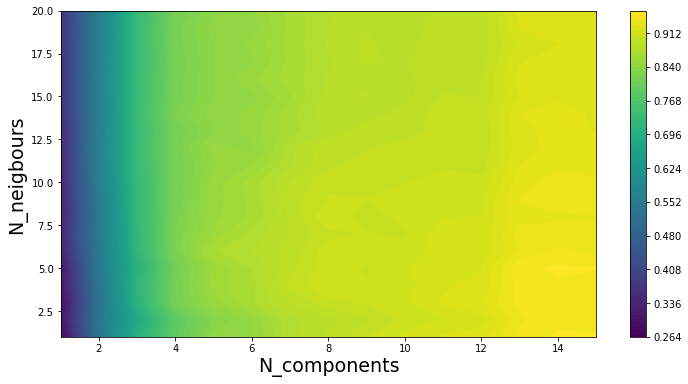

In [25]:
results = []

neighbors = range(1, 21)
components = range(1, 16)

for n_n in neighbors:
    for n_c in components:
        results.append(calculate_score(n_n, n_c))

x_pos, y_pos = np.meshgrid(components, neighbors)
plt.figure(figsize=(12,6))
plt.contourf(x_pos, y_pos, np.array(results).reshape(x_pos.shape), levels=100);
plt.colorbar()
plt.xlabel("N_components",fontsize=19)
plt.ylabel("N_neigbours",fontsize=19);

### Lets take another dataset of wines and see the effect of the data standatisation

In [26]:
from __future__ import print_function
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.pipeline import make_pipeline
print(__doc__)

# Code source: Tyler Lanigan <tylerlanigan@gmail.com>
#              Sebastian Raschka <mail@sebastianraschka.com>

# License: BSD 3 clause

RANDOM_STATE = 42
FIG_SIZE = (10, 7)

features = pd.DataFrame(load_wine(return_X_y=False)['data'],
                        columns=load_wine(return_X_y=False)['feature_names'])

target = load_wine(return_X_y=False)['target']
features.head(5)

Automatically created module for IPython interactive environment


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [0]:
# Make a train/test split using 30% test size
X_train, X_test, y_train, y_test = train_test_split(features, target,
                                                    test_size=0.30,
                                                    random_state=RANDOM_STATE)

OK, now when you now how to make pipeline, make pipeline with standard scaler and PCA and just PCA

In [0]:
# Fit to data and predict using pipelined PCA.
unscaled_clf = <YOUR CODE>

# Fit to data and predict using pipelined scaling, PCA.
std_clf = <YOUR CODE>



# Extract PCA from pipeline
pca = unscaled_clf.named_steps['pca']
pca_std = std_clf.named_steps['pca']


PC 1 without scaling:
 [ 1.76342917e-03 -8.35544737e-04  1.54623496e-04 -5.31136096e-03
  2.01663336e-02  1.02440667e-03  1.53155502e-03 -1.11663562e-04
  6.31071580e-04  2.32645551e-03  1.53606718e-04  7.43176482e-04
  9.99775716e-01]

PC 1 with scaling:
 [ 0.13443023 -0.25680248 -0.0113463  -0.23405337  0.15840049  0.39194918
  0.41607649 -0.27871336  0.33129255 -0.11383282  0.29726413  0.38054255
  0.27507157]


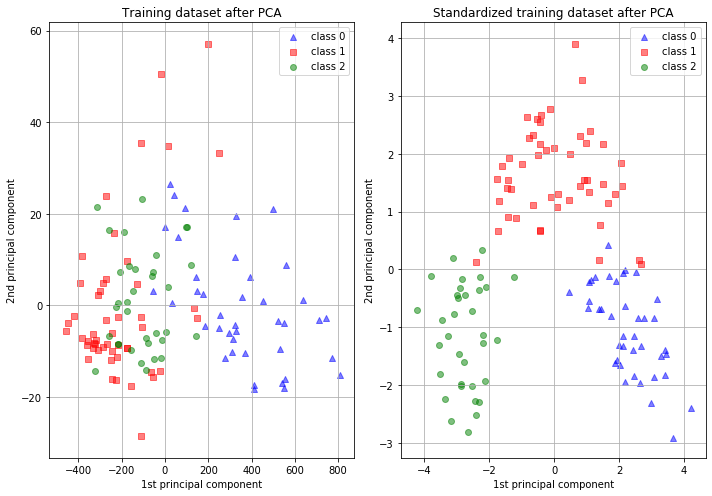

In [29]:
# Show first principal components
print('\nPC 1 without scaling:\n', pca.components_[0])
print('\nPC 1 with scaling:\n', pca_std.components_[0])

# Use PCA without and with scale on X_train data for visualization.
X_train_transformed = pca.transform(X_train)
scaler = std_clf.named_steps['standardscaler']
X_train_std_transformed = pca_std.transform(scaler.transform(X_train))

# visualize standardized vs. untouched dataset with PCA performed
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=FIG_SIZE)


for l, c, m in zip(range(0, 3), ('blue', 'red', 'green'), ('^', 's', 'o')):
    ax1.scatter(X_train_transformed[y_train == l, 0],
                X_train_transformed[y_train == l, 1],
                color=c,
                label='class %s' % l,
                alpha=0.5,
                marker=m
                )

for l, c, m in zip(range(0, 3), ('blue', 'red', 'green'), ('^', 's', 'o')):
    ax2.scatter(X_train_std_transformed[y_train == l, 0],
                X_train_std_transformed[y_train == l, 1],
                color=c,
                label='class %s' % l,
                alpha=0.5,
                marker=m
                )

ax1.set_title('Training dataset after PCA')
ax2.set_title('Standardized training dataset after PCA')

for ax in (ax1, ax2):
    ax.set_xlabel('1st principal component')
    ax.set_ylabel('2nd principal component')
    ax.legend(loc='upper right')
    ax.grid()

plt.tight_layout()

plt.show()

### Plot the variance ratio explained vs number components. Use the availible PCA class methods to do that.

In [ ]:
<YOUR CODE>

# SVD decomposition

if M is m x n matrix over field K, there is exists factorisation of it:

$$
M = U * S * V^{\dagger}, where
$$
- $U$ - is m x m unitary matrix over K,
- $S$ - is diagonal m x n matrix with non-negative real numbers,
- $V$ - is n x n unitary matrix over K.

The values $s_i$ of matrix S are known as singular values of M.
This decomposition is called Singular Value Decomposition - SVD.

Columns of $U$ anv $V$ are called left and right singular vectors of $M$:
$$
M v = s u, \
M^{\dagger} u = sv
$$

Various application in mathematics and optimisation - pseudo-inverse computation, low rank factorisation, application in solving systems of equations ...

If we define matrix $M$ to be $F$, and 

$$
G = U * S,
$$

we will get full PCA decomposition, where weight matrix $W$ is now $V$.

So, to get first K principal components we will just take first K columns of matrix $S * U$.

#### We can also look at those components in the initial basis of M. To do that we multiply them to the firt K rows of matrix $V^{\dagger}$.


In [32]:
!wget https://github.com/yandexdataschool/MLatImperial2020/raw/master/03_lab/swisscows_edit.jpg

--2020-01-29 21:59:04--  https://github.com/yandexdataschool/MLatImperial2020/raw/master/03_lab/swisscows_edit.jpg
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/yandexdataschool/MLatImperial2020/master/03_lab/swisscows_edit.jpg [following]
--2020-01-29 21:59:04--  https://raw.githubusercontent.com/yandexdataschool/MLatImperial2020/master/03_lab/swisscows_edit.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 135602 (132K) [image/jpeg]
Saving to: ‘swisscows_edit.jpg’

swisscows_edit.jpg  100%[===================>] 132.42K  --.-KB/s    in 0.04s   

2020-01-29 21:59:04 (3.49 MB/s) - ‘swisscows_edit.

In [36]:
from PIL import Image
from matplotlib.pyplot import imread
from skimage import color


img = color.rgb2grey(imread(r'swisscows_edit.jpg'))
img.shape

(600, 800)

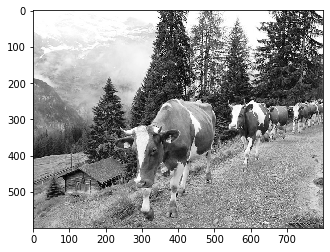

In [37]:
imgplot = plt.imshow(img, cmap='Greys_r')

# PCA via SVD for compression

We will use svd from scipy package

In [38]:
U, s, V_h = sla.svd(img, full_matrices=False)
print(U.shape, s.shape, V_h.shape)

(600, 600) (600,) (600, 800)


In [54]:
U, s, V_h = sla.svd(img, full_matrices=False)
pca_1 = (U[:,0]*s[0])[:,np.newaxis].dot(V_h[0,:][np.newaxis,:])
pca_1.shape

(600, 800)

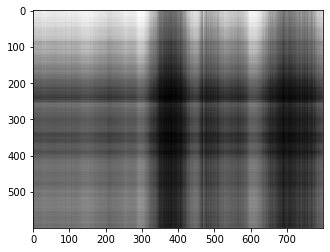

In [55]:
plt.imshow(pca_1, cmap='Greys_r');

#### Now write a function that will return pricipal components from Ith to Jth in intial basis (Hint: look how we have calculated the first component in the initial basis)

In [0]:
U, s, V_h = sla.svd(img, full_matrices=False)
def PCA(start_component = 0, end_component = 1, U = U, s = s, V_h = V_h):
    US = <YOUR CODE>
    return <YOUR CODE>

In [0]:
pca_1 = PCA()
pca_1_20 = PCA(end_component=20)
pca_1_50 = PCA(end_component=50)
pca_20_100 = PCA(20, 100)
pca_20_end = PCA(20, 384)
#pca_full = PCA(0, 384)

Text(0.5, 1.0, '20-end PCA')

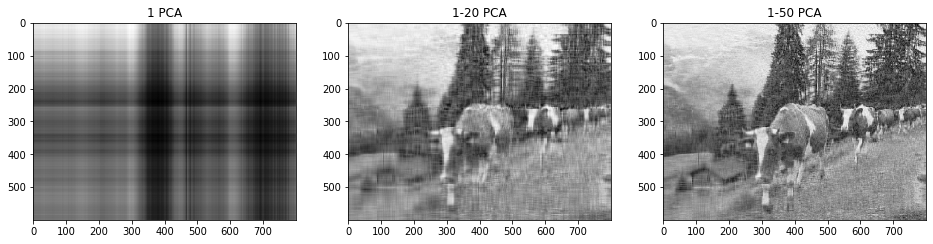

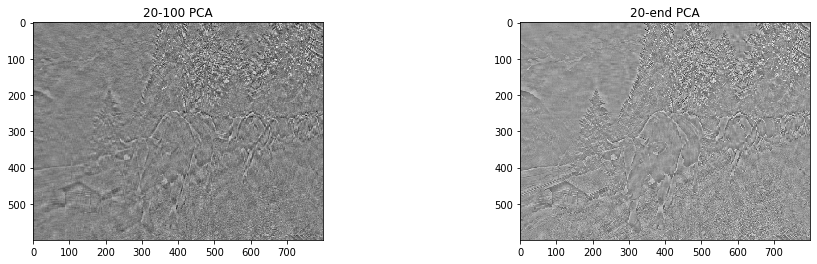

In [49]:
plt.figure(figsize=(16, 4))
plt.subplot(1,3,1)
imgplot = plt.imshow(pca_1, cmap='Greys_r')
plt.title("1 PCA")

plt.subplot(1,3,2)
imgplot = plt.imshow(pca_1_20, cmap='Greys_r')
plt.title("1-20 PCA")

plt.subplot(1,3,3)
imgplot = plt.imshow(pca_1_50, cmap='Greys_r')
plt.title("1-50 PCA")

plt.figure(figsize=(16, 4))
plt.subplot(1,2,1)
imgplot = plt.imshow(pca_20_100, cmap='Greys_r')
plt.title("20-100 PCA")

plt.subplot(1,2,2)
imgplot = plt.imshow(pca_20_end, cmap='Greys_r')
plt.title("20-end PCA")

### What do you think 1st PCA component reflects? How do you find, is 1-50 components gives you a good image?

In [50]:
img.shape

(600, 800)

First components reflects the biggest the place where one global objects transfers to another. At this place, the biggest gradient change happen.

Using first components of the image, it is possible to compress it in size ie.

using first K components will give memory gain

$$
\frac{N_{rows} * N_{cols}}{K * (N_{rows} + N_{cols} + 1)}
$$

Interesting and helpful link

[Medium](https://medium.com/@jonathan_hui/machine-learning-singular-value-decomposition-svd-principal-component-analysis-pca-1d45e885e491)